In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

data = pd.read_json('logins.json')

In [19]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Step 1:   Aggregate these login counts based on 15 minute time intervals.

In [21]:
data.set_index('login_time',inplace=True)
data['count']=1
data.sort_index(inplace=True)
data_agg = data.resample("15min").sum()

In [22]:
data_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [23]:
data_agg['count'].sum()

93142

Step 2: Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [24]:
data_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


We now create a plot of demand for the period from 1970-01-01 to 1970-04-13 

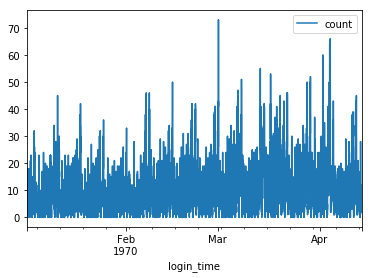

In [25]:
data_agg.plot()

We cannot really see much from the above graph except for the demand rises during the weekend and falls during the weekday. lets try to smooth out the window to precious day and see if that can give us better results.

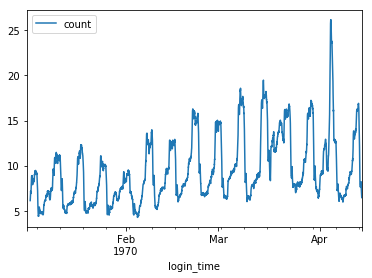

In [26]:
data_agg.rolling(window=96).mean().plot()

We can see that the demand rises and falls on a weekly basis.

Lets plot the demand just for the month of february.

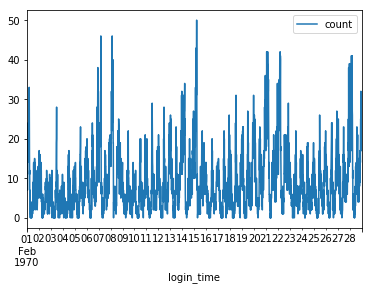

In [27]:
data_agg.loc['1970-02'].plot()

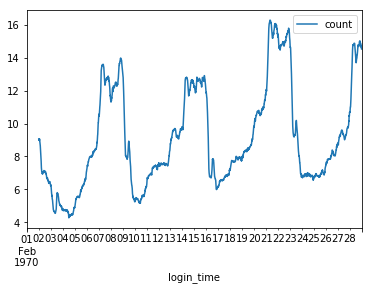

In [28]:
data_agg.loc['1970-02'].rolling(window=96).mean().plot()

So as you can clearly see, the demand clearly rises during the weekend. 

In [29]:
datetime.datetime(1970, 2, 1).weekday()

6

Lets plot a map starting from first day of the month which also happens to be a sunday.

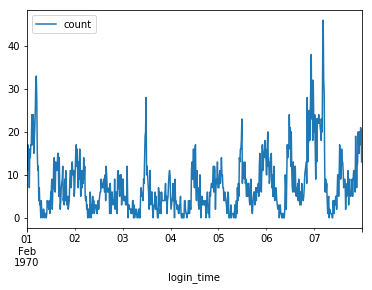

In [39]:
data_agg.loc['1970-02-01':'1970-02-07'].plot()

Lets create a smoothened map.

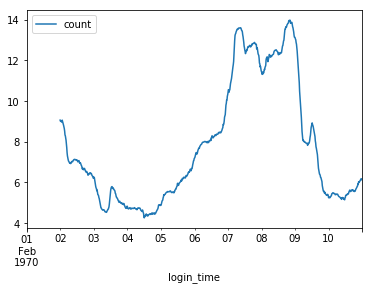

In [41]:
data_agg.loc['1970-02-01':'1970-02-10'].rolling(window=96).mean().plot()

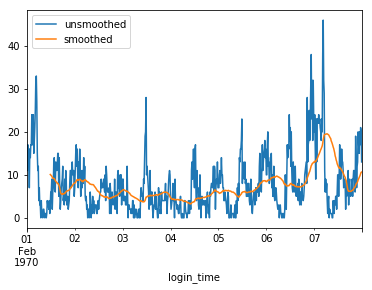

In [34]:
unsmoothed = data_agg['count']['1970-02-01':'1970-02-07']
smoothed = unsmoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

Lets now plot a graph for the weekend and see how demand spikes, starting from 6th february to 9th february.

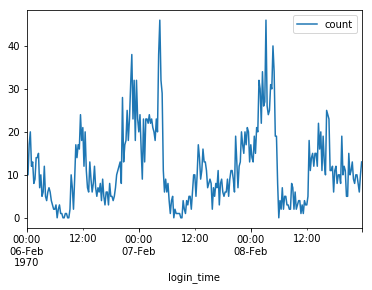

In [42]:
data_agg.loc['1970-02-06':'1970-02-08'].plot()

The demand spikes during the midnight and falls during the day.

Lets plot a graph for the weekdays.

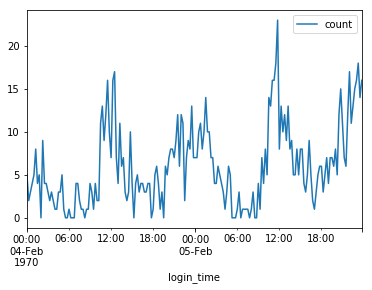

In [36]:
data_agg.loc['1970-02-04':'1970-02-05'].plot()

Demand spikes during noon and midnight. 
 
Let us try another weekday combination

In [37]:
date = datetime.datetime(1970, 3, 1)
date.weekday()

6

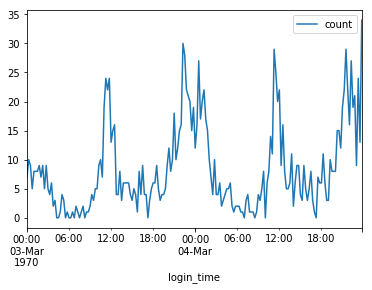

In [38]:
data_agg.loc['1970-03-03':'1970-03-04' ].plot()

Based on the above observations,we can conclude two things:

1. Demand is greater during weekends than during weekdays
2. Demand is greater around noon and midninght for weekdays and weekends.